# LAB 3: Linear Transformation and Inverse


# First: you should run this cell

In [1]:
# Make all numpy available via shorter 'np' prefix
import numpy as np
# Make all sympy available via shorter 'sym' prefix
import sympy as sym

import math


#import plotter
import matplotlib.pyplot as plt


def plot2d(H):
    x = H[0,:]
    y = H[1,:]
    plt.plot(x, y, 'ro', x, y, 'g-')
    plt.axis([-10, 10, -10, 10])
    plt.grid()

# Question 1: Geometry and Matrices

#### This question uses python to illustrate the geometric meaning of some special types of matrices.at next cell type:
- `plot2d(H)`

H = 
 [[-6 -6 -7  0  7  6  6 -3 -3  0  0 -6]
 [-7  2  1  8  1  2 -7 -7 -2 -2 -7 -7]]


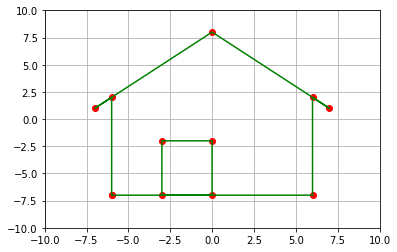

In [6]:
H = np.array([[-6,-6,-7, 0, 7, 6, 6,-3,-3, 0, 0,-6],[-7,2,1,8,1,2,-7,-7,-2,-2,-7,-7 ]])
print('H = \n', H)
plot2d(H)

A graphics window should open and display a crude drawing of a house. The matrix H contains the coordinates
of the endpoints of the line segments making up the drawing.

#### (a) Rotations: Generate a matrix Q and Let Q act on the house by plot2d(Q*H):

- `t = math.pi / 6`
- `Q = np.array([[math.cos(t), -math.sin(t)], [math.sin(t), math.cos(t)]])`
- Caculate `np.linalg.det(Q)`

##### Repeat this process with t = - pi/3 and answer (i) and (ii) in this case. Print the graph with the three house images on the same figure.

In [4]:
# solution 
# create transformation matrix 
angles =[math.pi/6, math.pi/3]
Q1 = np.array([[np.cos(angles[0]),-np.sin(angles[0])], [np.sin(angles[0]),np.cos(angles[0])]])
Q2 = np.array([[np.cos(angles[1]),-np.sin(angles[1])], [np.sin(angles[1]),np.cos(angles[1])]])
print(Q1, "\t\t\t", np.linalg.det(Q1))
print("="*50)
print(Q2, "\t\t\t", np.linalg.det(Q2))

[[ 0.8660254 -0.5      ]
 [ 0.5        0.8660254]] 			 1.0
[[ 0.5       -0.8660254]
 [ 0.8660254  0.5      ]] 			 1.0


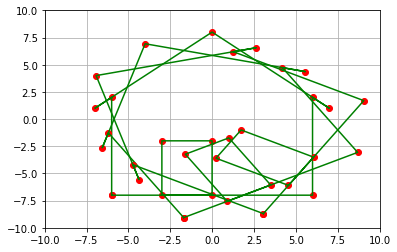

In [8]:
# applay to H and graph it 
plot2d(H)
plot2d(Q1 @ H)
plot2d(Q2 @ H)

#### (b) Dilations: Clear the graphics window and generate a new plot of the house as above. Generate a matrix D by
- `r = .9`
- `D = np.array([[r, 0], [0, 1 / r]])`
- Caculate `np.linalg.det(D)`

Let D act on the house by `plot2d(D*H)`.


#### Repeat this process with r = .8 and answer (i) and (ii) in this case. Print the graph with the three house images on the same figure.

In [14]:
# solution
# create transformation matrix 
scales = [0.9, 0.8]
D1 = np.array([[scales[0],0], [0,1/scales[0]]])
D2 = np.array([[scales[1],0], [0,1/scales[1]]])
print(D1, "\t\t\t", np.linalg.det(D1))
print("="*50)
print(D2, "\t\t\t", np.linalg.det(D2))

[[0.9        0.        ]
 [0.         1.11111111]] 			 1.0
[[0.8  0.  ]
 [0.   1.25]] 			 1.0


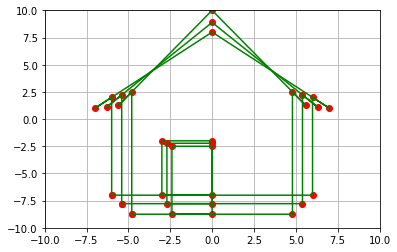

In [15]:
# applay to H and graph it 
plot2d(H)
plot2d(D1 @ H)
plot2d(D2 @ H)

#### (c) Shearing Transformations: Clear the graphics window and generate a new plot of the house as above. Generate a matrix T by

- `t = 1/2`
- `T = np.array([[1, t], [0, 1]])`
- - Caculate `np.linalg.det(T)`

Now let T act on the house by `plot2d(T*H)`.

#### Repeat this process with t = - 1/2 and answer (i) and (ii) in this case. Print the graph with the three house images on the same figure

In [17]:
# solution
# create transformation matrix 
t = [0.5, -0.5]
T1 = np.array([[1, t[0]], [0, 1]])
T2 = np.array([[1, t[1]], [0, 1]])
print(T1, "\t\t\t", np.linalg.det(T1))
print("="*50)
print(T2, "\t\t\t", np.linalg.det(T2))

[[1.  0.5]
 [0.  1. ]] 			 1.0
[[ 1.  -0.5]
 [ 0.   1. ]] 			 1.0


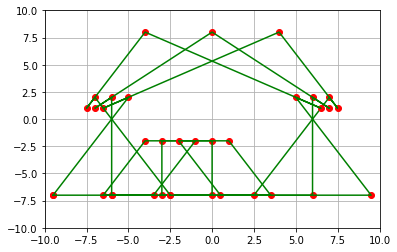

In [18]:
# applay to H and graph it 
plot2d(H)
plot2d(T1 @ H)
plot2d(T2 @ H)

# Question 2: Solving $Ax = b$

Implementing a function to Solve $Ax = b$ using the inverse of $A$ without using `numpy.linalg.inv`

### Step 1: 

- Define a function that checks that A and b have correct dimensions (number of rows of $A$ = number of rows of $b$). `check_dimensions(A, b)`. Return a `boolean`.

In [19]:
def check_dimensions(A, b):
    ##########type your code here#############
    return A.shape[0] == b.shape[0]
    ##########################################

### Step 2:
- Define a function that takes a matrix and check if it is a squared matrix. `check_squared(A)`. Return a `boolean`.

In [20]:
def check_squared(A):
    ##########type your code here#############
    return A.shape[0] == A.shape[1]
    ##########################################

### Step 3: 
- Define a function that takes a matrix and the indices of a column and a row and returns the corresponding minor coefficient. `minor_coef(A, i, j)`.

In [56]:
def minor_coef(A, i, j):
    ##########type your code here#############
    minor_matrix = np.array([])
    for row in range(A.shape[0]):
        for col in range(A.shape[1]):
            if row != i and col != j :
                 minor_matrix = np.block([minor_matrix , A[row][col]])
    if minor_matrix.shape[0] == 1:
        return minor_matrix[0]
    minor_matrix = minor_matrix.reshape(minor_matrix.shape[0]//2, minor_matrix.shape[0]//2)
    return np.linalg.det(minor_matrix)
    ##########################################

In [57]:
minor_coef(A,0,0)

4.0

### Step 4:
- Define a function that takes a matrix and gives its matrix of minors. `minors(A)`.

In [23]:
def minors(A):
    M = np.zeros(A.shape)
    ##########type your code here#############
    
            M[i,j] = minor_coef(A,i,j)
    ##########################################
    return M

In [61]:
minors(A)

array([[4., 3.],
       [2., 1.]])

### Step 5:
- Define a function that takes matrix $A$ gives a matrix of cofactors. `cofactors(A)`

In [79]:
def cofactors(A):
    M = minors(A)
    C = np.zeros(M.shape)
    ##########type your code here#############
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            C[i,j] = (-1)**(i+j)
    C = C * M
    ##########################################
    return C

In [80]:
cofactors(A)

array([[ 4., -3.],
       [-2.,  1.]])

### Step 6:
- Define a function that takes a matrix and gives its transpose. `transpose(A)`

In [81]:
def transpose(A):
    A_T = np.zeros(A.shape)
    ##########type your code here#############
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            A_T[i][j] = A[j][i]
    ##########################################
    return A_T

In [82]:
transpose(A)

array([[1., 3.],
       [2., 4.]])

### Step 7:
- Code a function that gives the inverse of a matrix. `inverse(A)`.
    - Check first if the matrix is a square matrix. If not raise an error.
    - Check if the matrix is invertible. If not raise an error.

In [83]:
def inverse(A): 
    if not check_squared(A):
        raise Exception('A is not a square matrix.')
    d = np.linalg.det(A)
    if abs(d) < 10 ** -10:
        raise Exception('Singular matrix: A is not invertible.')
    ##########type your code here#############
    C = cofactors(A)
    C_T = transpose(C)
    A_inverse = 1/d * C_T
    ##########################################
    return A_inverse

In [84]:
print(inverse(A))
print(np.linalg.inv(A))

[[-2.   1. ]
 [ 1.5 -0.5]]
[[-2.   1. ]
 [ 1.5 -0.5]]


### Step 8:
- Define a function that takes a matrix $A$, a vector $b$ and gives the vector $x$ solution of $Ax = b$. `solve(A, b)`.
- Check dimension first if not raise an error.

In [85]:
def solve(A, b): 
    if not check_dimensions(A, b):
        raise Exception('Inconsistent Dimensions.')
    ##########type your code here#############
    x = inverse(A) @ b
    ##########################################
    print(f"A = \n {A}")
    print(f"b = \n {b}")
    print(f"x = \n {x}")
    print(f"A@x = \n {A@x}")

### Step 9:
- Use the function `solve` in the previous step to solve the following systems of linear equations:

1) $x + 2y = -1$; $3x + 4y = 1$

2) $3x - 2y + z = 7$; $x + z = 2$; $-2y - z = 3$

In [86]:
# soulution
A = np.array([[1, 2], [3, 4]])
b = np.array([[-1],[1]])
solve(A, b)

A = 
 [[1 2]
 [3 4]]
b = 
 [[-1]
 [ 1]]
x = 
 [[ 3.]
 [-2.]]
A@x = 
 [[-1.]
 [ 1.]]


In [14]:
#type your code here:


A =
 [[1 2]
 [3 4]]

b =
 [[-1]
 [ 1]]

x =
 [[ 3.]
 [-2.]]

A @ x =
 [[-1.]
 [ 1.]]



In [89]:
# soulution
A = np.array([[ 3, -2,  1], [ 1,  0,  1],[ 0, -2, -1]])
b = np.array([[7], [2], [3]])
solve(A, b)

A = 
 [[ 3 -2  1]
 [ 1  0  1]
 [ 0 -2 -1]]
b = 
 [[7]
 [2]
 [3]]
x = 
 [[ 0. ]
 [-2.5]
 [ 2. ]]
A@x = 
 [[7.]
 [2.]
 [3.]]


In [15]:
#type your code here:


A =
 [[ 3 -2  1]
 [ 1  0  1]
 [ 0 -2 -1]]

b =
 [[7]
 [2]
 [3]]

x =
 [[ 0. ]
 [-2.5]
 [ 2. ]]

A @ x =
 [[7.]
 [2.]
 [3.]]



### Step 10:
- Error testing: Run the following cells to test the erros.

In [29]:
A = np.array([[3, -2, 1],
              [1, 0, 1],
              [0, -2, -1]])

b = np.array([[7],
              [2]])

print('A =\n {}\n'.format(A))
print('b =\n {}\n'.format(b))

x = solve(A, b)

A =
 [[ 3 -2  1]
 [ 1  0  1]
 [ 0 -2 -1]]

b =
 [[7]
 [2]]



Exception: Inconsistent Dimensions.

In [30]:
A = np.array([[3, 1],
              [-2, 0],
              [1, 1]])

b = np.array([[7],
              [2],
              [3]])

print('A =\n {}\n'.format(A))
print('b =\n {}\n'.format(b))

x = solve(A, b)

A =
 [[ 3  1]
 [-2  0]
 [ 1  1]]

b =
 [[7]
 [2]
 [3]]



Exception: A is not a square matrix.

In [31]:
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

b = np.array([[7],
              [2],
              [3]])

print('A =\n {}\n'.format(A))
print('b =\n {}\n'.format(b))

x = solve(A, b)

A =
 [[1 2 3]
 [4 5 6]
 [7 8 9]]

b =
 [[7]
 [2]
 [3]]



Exception: Singular matrix: A is not invertible.